## Observations and Insights 

In [1]:
# 3 OBSERVATIONS from the Analysis:
# 1. Heavier the mouse more tumor volume which concludes less effectiveness of drugs as seen by scatter plot.
# 2. As per box plot Capomulin drug is the most effective with least average tumor volume.
# 3. The least promising drug is Infubinol due to outliers as compared to other drugs.
    

In [2]:
# Dependencies and Setup
#%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import sem

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single dataset
data_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

# Display the data table for preview
data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
no_of_mice = len(data_df["Mouse ID"].unique())
no_of_mice

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = data_df.loc[data_df.duplicated(subset = ['Mouse ID','Timepoint']),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data = pd.DataFrame(duplicate_mice)
duplicate_data

,0
0,g989


In [6]:
#duplicate check
dupes = data_df.loc[data_df['Mouse ID'] == 'g989']
dupes

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = data_df[data_df['Mouse ID'].isin(duplicate_mice)==False]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Checking the number of mice in the clean DataFrame.
clean_no_of_mice = len(clean_df["Mouse ID"].unique())
clean_no_of_mice

248

## Summary Statistics

In [9]:
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
data_mean = clean_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
data_mean

data_median = clean_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
data_median

data_variance = clean_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
data_variance

data_std = clean_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
data_std

data_sem = clean_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
data_sem

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
summary_df = pd.DataFrame({"Mean": data_mean,"Median": data_median,"Variance": data_variance,"STD": data_std,
                           "SEM": data_sem})
summary_df


,Mean,Median,Variance,STD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
group = clean_df.groupby("Drug Regimen")
Aggregate_df = group.agg(['mean', 'median','var','std','sem'])["Tumor Volume (mm3)"]
Aggregate_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

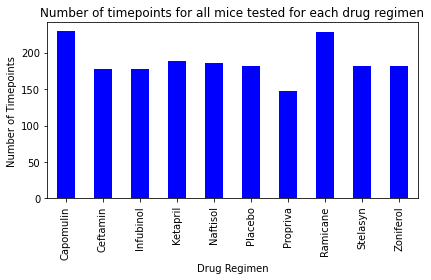

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
no_of_timepoints = clean_df.groupby(["Drug Regimen"]).count()["Timepoint"]
no_of_timepoints
no_of_timepoints.plot.bar(color="b", align="center")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.title("Number of timepoints for all mice tested for each drug regimen")
plt.tight_layout()

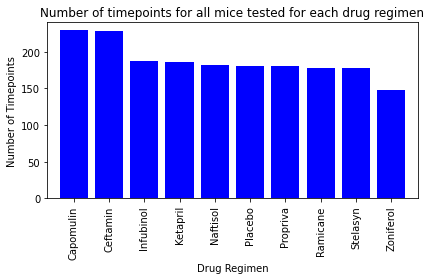

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = np.arange(len(no_of_timepoints))
x_axis
y_axis = clean_df['Drug Regimen'].value_counts()
y_axis
plt.bar(x_axis,y_axis,color="b",align="center")
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(y_axis)+10)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane',
                            'Stelasyn', 'Zoniferol'],rotation='vertical')

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.title("Number of timepoints for all mice tested for each drug regimen")
plt.tight_layout()

In [14]:
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


Male      958
Female    922
Name: Sex, dtype: int64

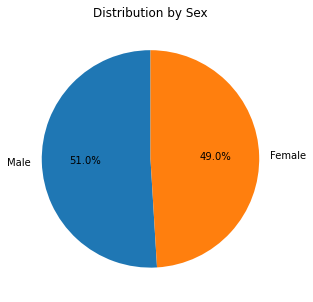

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
a = clean_df["Sex"].value_counts()

plot = a.plot.pie(autopct="%1.1f%%",figsize=(5, 5),startangle=90,title='Distribution by Sex')
plot.set_ylabel('')
a

In [16]:
#y axis
k =a.index
k

Index(['Male', 'Female'], dtype='object')

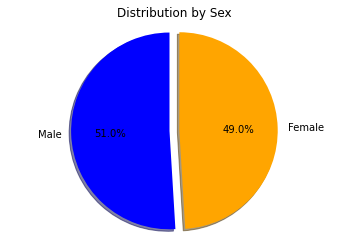

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
explode = (0.1,0)
colors = ["Blue","Orange"]
plt.pie(a, explode=explode, labels=k, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.title('Distribution by Sex')
plt.show()         


## Quartiles, Outliers and Boxplots

In [18]:
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

max_timepoint = pd.DataFrame(clean_df.groupby('Mouse ID')['Timepoint'].max().sort_values()).rename(columns={'Timepoint': 'max_timepoint'})
max_timepoint

merged_df = pd.merge(clean_df, max_timepoint, on='Mouse ID')
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,max_timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [20]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drug_values = []
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes   
    # add subset    
    # Determine outliers using upper and lower bounds
    
for x in drugs:
    temp_df = merged_df.loc[merged_df['Drug Regimen'] == x]
    
    final_volume = temp_df.loc[temp_df['Timepoint'] == temp_df['max_timepoint']]
    final_volume_values = final_volume['Tumor Volume (mm3)']
    drug_values.append(final_volume_values)
    #IQR
    quartiles = final_volume_values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    IQR = upperq-lowerq
    print(f'IQR for {x}: {IQR}')
    #upper and lower bound
    lower_bound = lowerq - (1.5*IQR)
    upper_bound = upperq + (1.5*IQR)
    print(f'Lower Bound for {x}: {lower_bound}')
    print(f'Upper Bound for {x}: {upper_bound}')
    #Outliers
    Outliers = (final_volume_values.loc[(final_volume['Tumor Volume (mm3)'] >= upper_bound) | 
                                        (final_volume['Tumor Volume (mm3)'] <= lower_bound)]).count()
    print(f'Number of {x} outliers: {Outliers}')
    
    

    

IQR for Capomulin: 7.781863460000004
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
Number of Capomulin outliers: 0
IQR for Ramicane: 9.098536719999998
Lower Bound for Ramicane: 17.912664470000003
Upper Bound for Ramicane: 54.30681135
Number of Ramicane outliers: 0
IQR for Infubinol: 11.477135160000003
Lower Bound for Infubinol: 36.83290494999999
Upper Bound for Infubinol: 82.74144559000001
Number of Infubinol outliers: 1
IQR for Ceftamin: 15.577752179999997
Lower Bound for Ceftamin: 25.355449580000002
Upper Bound for Ceftamin: 87.66645829999999
Number of Ceftamin outliers: 0


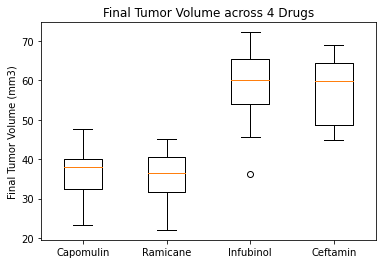

In [21]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

plt.boxplot(drug_values)
plt.title('Final Tumor Volume across 4 Drugs')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

plt.show()

## Line and Scatter Plots

In [22]:
#picking random mouse treated with Capomulin
clean_df.head()
g = clean_df.groupby("Drug Regimen").max()
g

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,y793,Male,24,25,45,48.158209,3
Ceftamin,y865,Male,24,30,45,68.923185,4
Infubinol,z581,Male,24,30,45,72.226731,4
Ketapril,y260,Male,24,30,45,78.567014,4
Naftisol,z969,Male,23,30,45,76.668817,4
Placebo,y478,Male,21,30,45,73.212939,4
Propriva,z435,Male,24,30,45,72.455421,4
Ramicane,z578,Male,23,25,45,47.622816,3
Stelasyn,z314,Male,23,30,45,75.123690,4


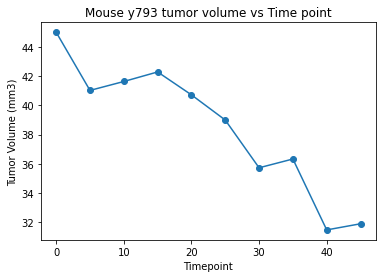

In [23]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

mouse = clean_df.loc[clean_df['Mouse ID'] == 'y793']
plt.plot(mouse['Timepoint'], mouse['Tumor Volume (mm3)'], marker = 'o')
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse y793 tumor volume vs Time point")
plt.show()

In [24]:
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


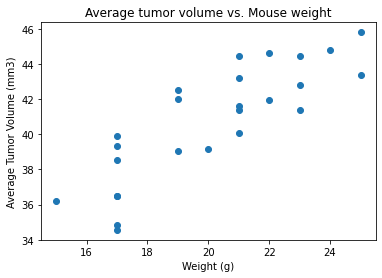

In [25]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
w = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']
avg_vol_df = pd.DataFrame(w.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).rename(columns={'Tumor Volume (mm3)': 'Average Tumor Volume (mm3)'})
#getting rid of duplicates
new_vol_df = pd.merge(w, avg_vol_df, on='Mouse ID')
final_df = new_vol_df[['Weight (g)', 'Average Tumor Volume (mm3)']].drop_duplicates()
final_df
#plotting
m = final_df['Weight (g)']
n = final_df['Average Tumor Volume (mm3)']
plt.scatter(m, n)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average tumor volume vs. Mouse weight')
plt.show()


## Correlation and Regression

The correlation coefficient is 0.84.


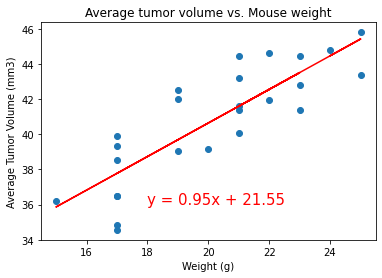

In [29]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(m,n)
print(f"""The correlation coefficient is {round(correlation[0],2)}.""")

(slope, intercept, rvalue, pvalue, stderr) = linregress(m, n)
regress_values = m * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(m,n)
plt.plot(m,regress_values,"r-")

plt.annotate(line_eq,(18,36),fontsize=15,color="red")

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average tumor volume vs. Mouse weight')
plt.show()